importing packages and then a data set

In [1]:
import pandas as pd 
import matplotlib as plt

In [5]:
df = pd.read_csv("C:/Users/PC/Downloads/website_data.csv")

Explorig data

In [7]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


,traffic
count,393.000000
mean,3046.516539
std,1198.711162
min,913.000000
25%,2039.000000
50%,2802.000000
75%,4355.000000
max,4941.000000


In [8]:
df.head()

,traffic
0,932
1,929
2,938
3,964
4,990


<Axes: >

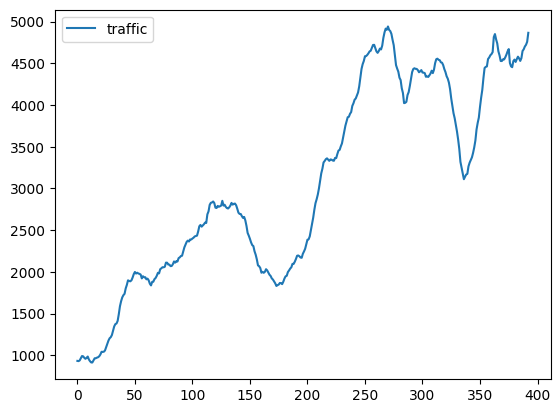

In [9]:
df.plot()

In [10]:
msk = (df.index > len(df)-30)
dftrain = df[msk].copy()
dftest = df[~msk].copy()

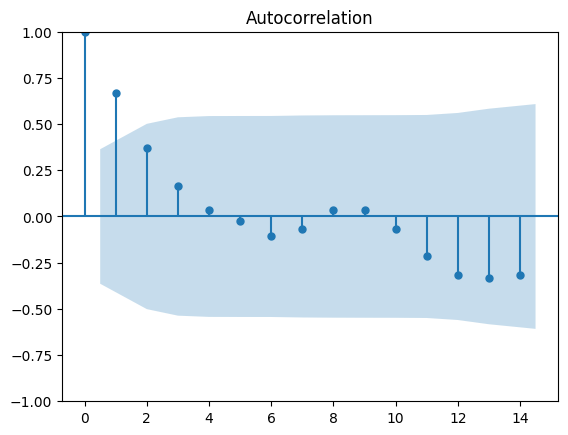

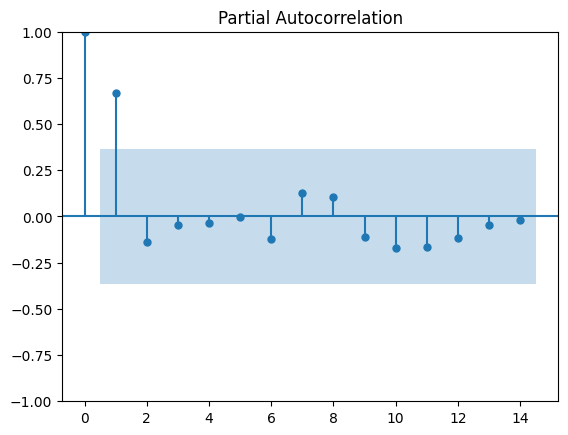

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(dftrain)

pacf_original = plot_pacf(dftrain)

In [16]:
dftrain

,traffic
364,4787
365,4738
366,4643
367,4594
368,4527
369,4527
370,4547
371,4546
372,4572
373,4604


In [18]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 3.6 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.8 MB 7.6 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 13.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ----- ---------------------------------- 5.2/41.0 MB 24.1 MB/s eta 0:00:02
   --------- ------------------------------ 10.2/41.0 MB 23.4 MB/s eta 0:00:02
   --------------- ------------------------ 15.5/41.0 MB 23.7 MB/s eta 0:00:02
   ------------------- -------------------- 20.2/41.0 MB 23.4 MB/s eta 0:00:01
   ----------------------- ---------------- 24.4/41.0 MB 23.4 MB/s eta 0:00:01
   ------------

printing the augumented dickey fuller test

In [21]:
from statsmodels.tsa.stattools import adfuller
ADF = adfuller(dftrain)

In [22]:
print(f'p-value: {ADF[1]}')

p-value: 0.7695300587084772


<Axes: >

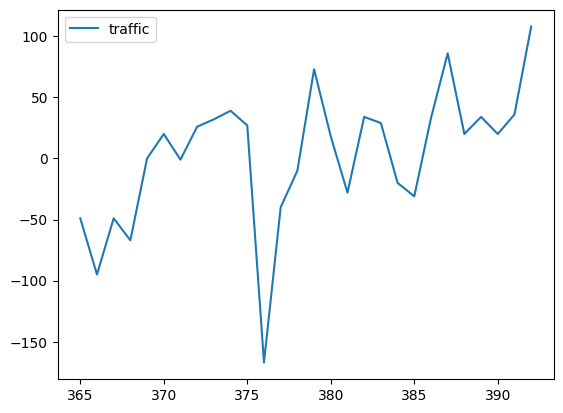

In [23]:
dftraindiff = dftrain.diff().dropna()
dftraindiff.plot()

In [25]:
ADF1 =adfuller(dftraindiff)
print(f'p-value:{ADF1[1]}')

p-value:0.023685891679283855


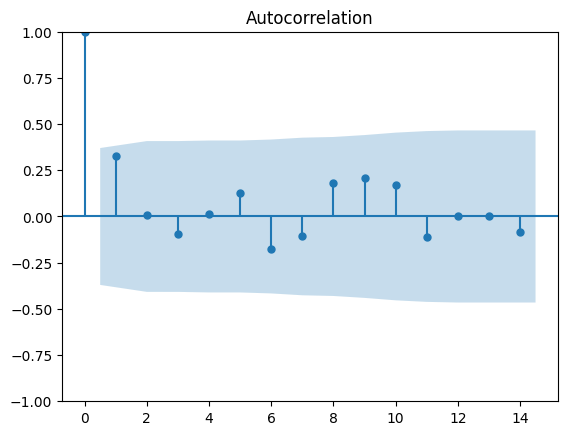

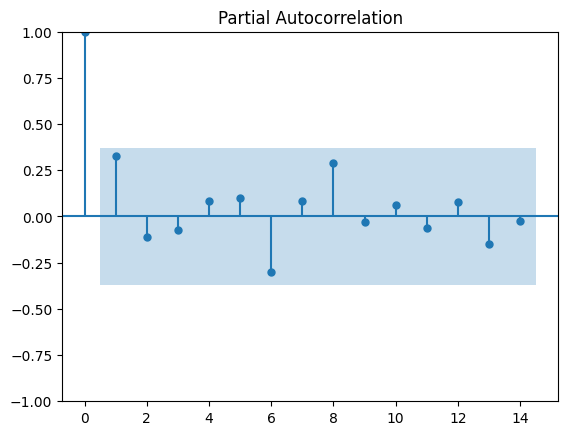

In [26]:
plotacfdiff = plot_acf(dftraindiff)
plotpacfdiff = plot_pacf(dftraindiff)

In [28]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(dftrain, order=(2,1,0))
modelfit = model.fit()
print(modelfit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                   29
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -150.134
Date:                Tue, 22 Apr 2025   AIC                            306.268
Time:                        17:09:31   BIC                            310.265
Sample:                             0   HQIC                           307.490
                                 - 29                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4020      0.309      1.299      0.194      -0.205       1.009
ar.L2         -0.1255      0.324     -0.388      0.698      -0.760       0.509
sigma2      2635.0686    557.863      4.724      0.0

c:\data\python\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\data\python\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\data\python\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [29]:
import matplotlib.pyplot as plt

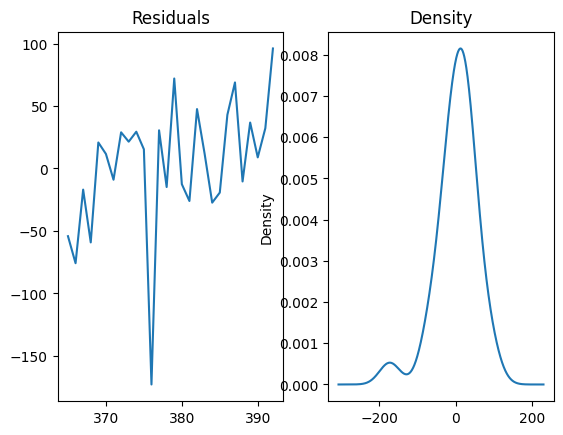

In [31]:
residuals = modelfit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

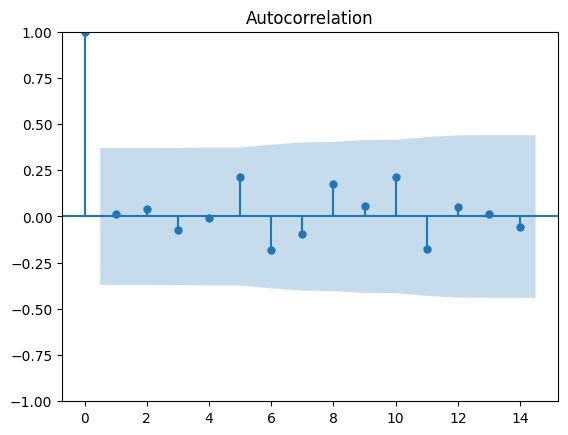

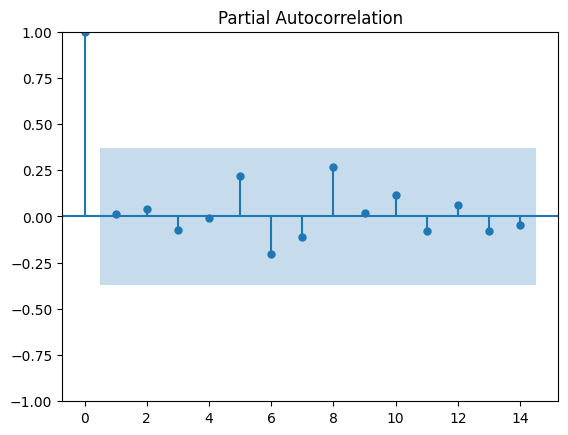

In [32]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

c:\data\python\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\data\python\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

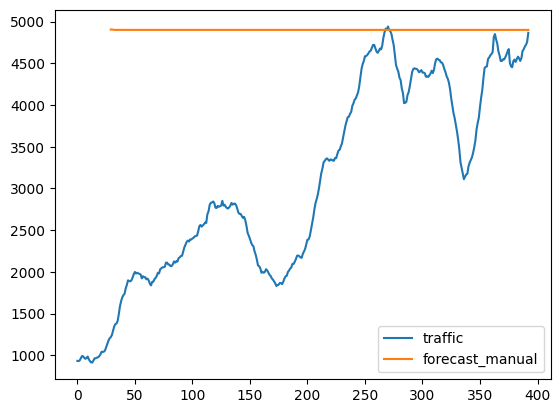

In [35]:
forecast_test = modelfit.forecast(len(dftest))

df['forecast_manual'] = [None]*len(dftrain) + list(forecast_test)

df.plot()